<a href="https://colab.research.google.com/github/amazzoli/ComponentSystemsData/blob/main/datasets/books/inspect_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloning the repository in the colab folder structure
%%bash
git clone https://github.com/amazzoli/ComponentSystemsData.git

Cloning into 'ComponentSystemsData'...
Filtering content: 100% (2/2), 100.21 MiB | 50.23 MiB/s, done.


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

# Changing directory where the notebook is placed
os.chdir('/content/ComponentSystemsData/datasets/books')

sys.path.append('/content/ComponentSystemsData/py_utils/')
import plot_utils as pu

# Inspecting linguistic objects: **books** (from Project Gutenberg https://www.gutenberg.org/)

The table `objects.tsv` contains information about:

- **sparse_id**: identifier of the matrix coordinates in the sparse representation.
- **author** and **title** of the book.
- **size**: number of words in the book.
- **vocabulary**: number of different words in the book.

In [ ]:
data_folder = 'data/'
objects = pd.read_csv(data_folder+'objects.tsv', sep='\t', index_col=0)
objects

,author,title,size,vocabulary
id,,,,
0,Abraham Lincoln,Lincoln Letters,1021,382
1,Abraham Lincoln,Lincoln's First Inaugural Address,3631,1008
2,Abraham Lincoln,"Lincoln's Gettysburg Address, given November 1...",280,148
3,Abraham Lincoln,"Lincoln's Inaugurals, Addresses and Letters (S...",43623,5123
4,Abraham Lincoln,Lincoln's Second Inaugural Address,706,338
...,...,...,...,...
3030,Zane Grey,The Young Forester,50535,5144
3031,Zane Grey,The Young Pitcher,55071,5256
3032,Zane Grey,To the Last Man,95996,7686


### Size distribution

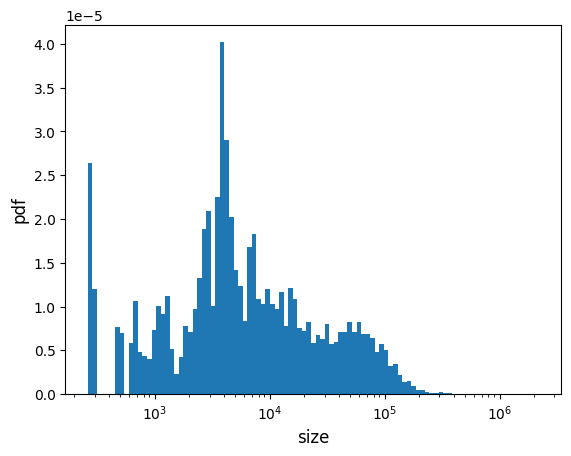

In [ ]:
plt.xlabel('size', fontsize=12)
plt.ylabel('pdf', fontsize=12)
plt.xscale('log')

logbins = np.logspace(np.log10(objects['size'].min()), np.log10(objects['size'].max()), 100)
h = plt.hist(objects['size'], bins=logbins, density=True)

### Heaps' law

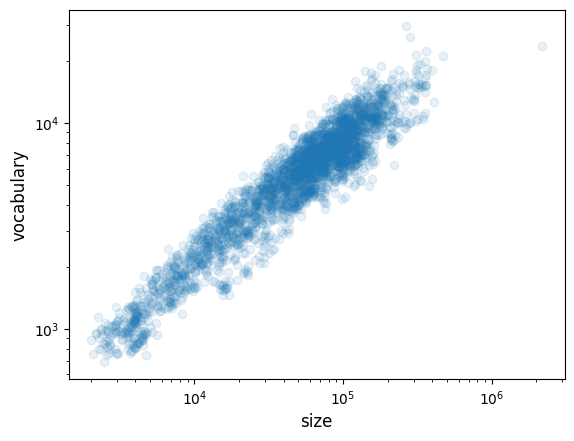

In [ ]:
min_size = 2000
min_voc = 0
mask = np.logical_and(objects['size'] >= min_size, objects['vocabulary'] >= min_voc)
xs = objects[mask]['size']
ys = objects[mask]['vocabulary']

plt.xlabel('size', fontsize=12)
plt.ylabel('vocabulary', fontsize=12)
plt.loglog()
img = plt.scatter(xs, ys, alpha=0.1)

### Genome counts of taxonomical units

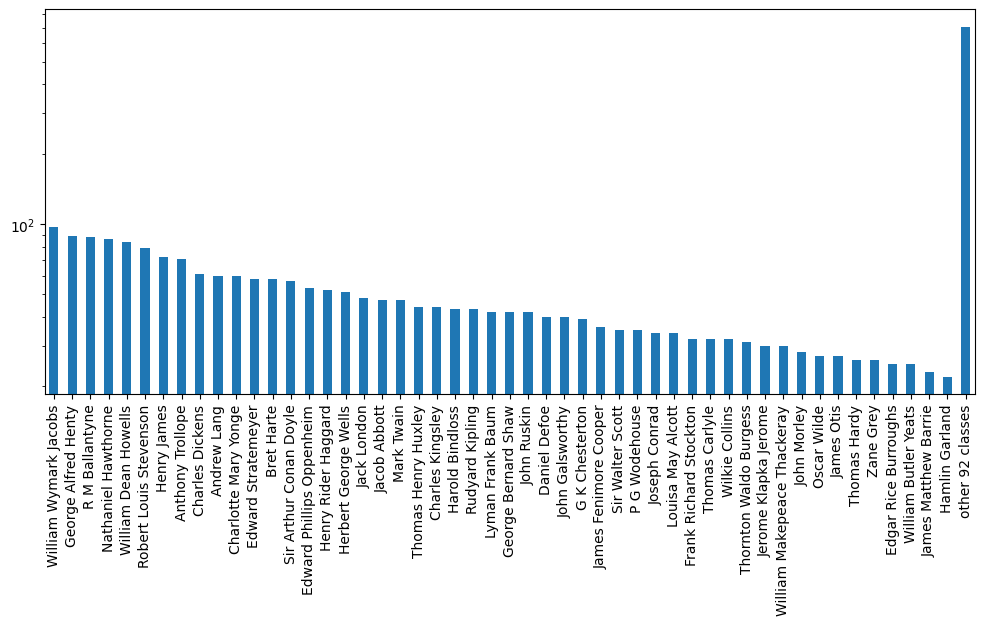

In [ ]:
n_max_classes = 50

fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')
ax = pu.plot_sorted_bar(ax, objects['author'].value_counts(), n_max_classes)